In [ ]:
!git clone https://github.com/dayatsa/OpedQuadruped.git

fatal: destination path 'OpedQuadruped' already exists and is not an empty directory.


In [ ]:
import os
import numpy
import json
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

#Rewards Roll

In [ ]:
dir = os.listdir('/content/OpedQuadruped/oped/oped_teleopp/rewards/x')
sorted_dir = sorted(dir)
print(sorted_dir)

['reward_x_15-11-2021_13-27.json', 'reward_x_16-11-2021_06-40.json', 'reward_x_16-11-2021_14-29.json', 'reward_x_17-11-2021_11-56.json', 'reward_x_17-11-2021_12-35.json']


In [ ]:
with open('/content/OpedQuadruped/oped/oped_teleopp/rewards/x/' + sorted_dir[0]) as f:
    data = json.load(f)
print(data.keys())

dict_keys(['end_date', 'rewards', 'lr', 'move_step', 'limit_upright', 'action_size', 'start_date', 'gamma'])


In [ ]:
reward_avg = []
reward_max = []
reward_min = []
training_time = []
FMT = "%d-%m-%Y_%H:%M"

for i in range(len(sorted_dir) - 1):
  with open('/content/OpedQuadruped/oped/oped_teleopp/rewards/x/' + sorted_dir[i]) as f:
    data = json.load(f)
    reward_avg = reward_avg + data['rewards']['avg']
    reward_max = reward_max + data['rewards']['max']
    reward_min = reward_min + data['rewards']['min']
    start_train = data['start_date']
    stop_train = data['end_date']
    training_time.append(datetime.strptime(stop_train, FMT) - datetime.strptime(start_train, FMT))

reward_avg = np.array(reward_avg)
reward_max = np.array(reward_max)
reward_min = np.array(reward_min)
training_time = np.array(training_time)

print("reward avg: ", reward_avg.shape)
print("reward max: ", reward_max.shape)
print("reward min: ", reward_min.shape)
print("training time: ", training_time.shape)

reward avg:  (431,)
reward max:  (431,)
reward min:  (431,)
training time:  (4,)


In [ ]:
print(training_time)
sum_training_time = np.sum(training_time)
print(sum_training_time)

[datetime.timedelta(seconds=41640) datetime.timedelta(seconds=24240)
 datetime.timedelta(seconds=28020) datetime.timedelta(seconds=43920)]
1 day, 14:17:00


In [ ]:
episode = [i*20 for i in range(len(reward_avg))]
len(episode)

431

max:  2311.0


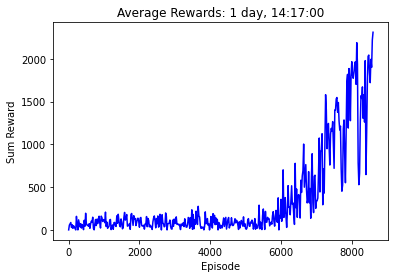

In [ ]:
print("max: ", max(reward_avg))
fig, ax = plt.subplots()
ax.plot(episode, reward_avg, color='blue')
# Set plot title and axes labels
ax.set(title = "Average Rewards: " + str(sum_training_time),
       xlabel = "Episode",
       ylabel = "Sum Reward")

plt.show()

max:  2900


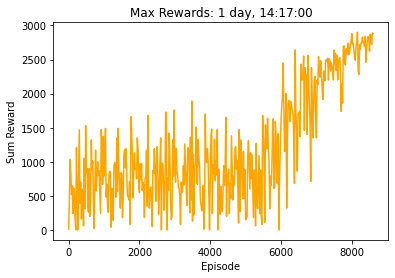

In [ ]:
print("max: ", max(reward_max))
fig, ax = plt.subplots()
ax.plot(episode, reward_max, color='orange')
# Set plot title and axes labels
ax.set(title = "Max Rewards: " + str(sum_training_time),
       xlabel = "Episode",
       ylabel = "Sum Reward")

plt.show()

max:  1660


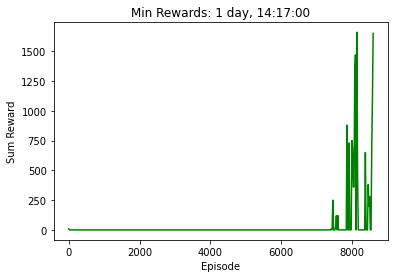

In [ ]:
print("max: ", max(reward_min))
fig, ax = plt.subplots()
ax.plot(episode, reward_min, color='green')
# Set plot title and axes labels
ax.set(title = "Min Rewards: " + str(sum_training_time),
       xlabel = "Episode",
       ylabel = "Sum Reward")

plt.show()

Exploration decay: 4000 , 9000 , 0.0002


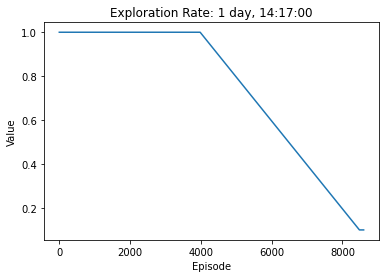

In [ ]:
EXPLORATION_MIN    = 0.1
START_EXPLORATION_DECAY = 4000
END_EXPLORATION_DECAY = 9000
EXPLORATION_DECAY  = 1.0/float(END_EXPLORATION_DECAY - START_EXPLORATION_DECAY)
print("Exploration decay: {} , {} , {}".format(START_EXPLORATION_DECAY, END_EXPLORATION_DECAY, EXPLORATION_DECAY))
exploration_rate   = 1.0

exploration_data = []
for ep in episode:
  if END_EXPLORATION_DECAY >= ep >= START_EXPLORATION_DECAY:
    if exploration_rate > EXPLORATION_MIN:
      exploration_rate -= EXPLORATION_DECAY*20
  exploration_data.append(exploration_rate)

fig, ax = plt.subplots()
ax.plot(episode, exploration_data)
# Set plot title and axes labels
ax.set(title = "Exploration Rate: " + str(sum_training_time),
       xlabel = "Episode",
       ylabel = "Value")

plt.show()

#Rewards Pitch

In [ ]:
dir = os.listdir('/content/OpedQuadruped/oped/oped_teleopp/rewards/y')
sorted_dir = sorted(dir)
sorted_dir

['reward_y_12-11-2021_03-45.json',
 'reward_y_12-11-2021_12-31.json',
 'reward_y_12-11-2021_14-54.json',
 'reward_y_12-11-2021_17-01.json',
 'reward_y_13-11-2021_05-14.json',
 'reward_y_13-11-2021_07-28.json',
 'reward_y_13-11-2021_10-33.json',
 'reward_y_13-11-2021_12-23.json',
 'reward_y_13-11-2021_13-36.json',
 'reward_y_13-11-2021_16-55.json',
 'reward_y_13-11-2021_18-39.json',
 'reward_y_14-11-2021_04-33.json',
 'reward_y_14-11-2021_05-35.json']

In [ ]:
with open('/content/OpedQuadruped/oped/oped_teleopp/rewards/y/' + sorted_dir[0]) as f:
    data = json.load(f)
print(data.keys())

dict_keys(['end_date', 'rewards', 'lr', 'move_step', 'limit_upright', 'action_size', 'start_date', 'gamma'])


In [ ]:
reward_avg = []
reward_max = []
reward_min = []
training_time = []
FMT = "%d-%m-%Y_%H:%M"

for i in range(len(sorted_dir) - 6):
  with open('/content/OpedQuadruped/oped/oped_teleopp/rewards/y/' + sorted_dir[i]) as f:
    data = json.load(f)
    reward_avg = reward_avg + data['rewards']['avg']
    reward_max = reward_max + data['rewards']['max']
    reward_min = reward_min + data['rewards']['min']
    start_train = data['start_date']
    stop_train = data['end_date']
    training_time.append(datetime.strptime(stop_train, FMT) - datetime.strptime(start_train, FMT))

reward_avg = np.array(reward_avg)
reward_max = np.array(reward_max)
reward_min = np.array(reward_min)
training_time = np.array(training_time)

print("reward avg: ", reward_avg.shape)
print("reward max: ", reward_max.shape)
print("reward min: ", reward_min.shape)
print("training time: ", training_time.shape)

reward avg:  (512,)
reward max:  (512,)
reward min:  (512,)
training time:  (7,)


In [ ]:
print(training_time)
sum_training_time = np.sum(training_time)
print(sum_training_time)

[datetime.timedelta(seconds=60600) datetime.timedelta(seconds=20520)
 datetime.timedelta(seconds=2160) datetime.timedelta(seconds=7560)
 datetime.timedelta(seconds=20820) datetime.timedelta(seconds=28860)
 datetime.timedelta(seconds=10680)]
1 day, 18:00:00


In [ ]:
episode = [i*20 for i in range(len(reward_avg))]
len(episode)

512

max:  2141.0


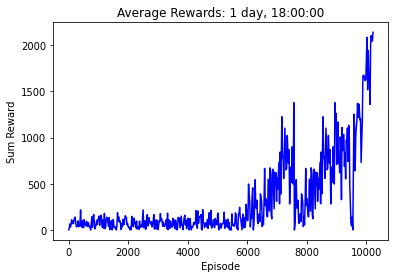

In [ ]:
print("max: ", max(reward_avg))
fig, ax = plt.subplots()
ax.plot(episode, reward_avg, color='blue')
# Set plot title and axes labels
ax.set(title = "Average Rewards: " + str(sum_training_time),
       xlabel = "Episode",
       ylabel = "Sum Reward")

plt.show()

max:  2930


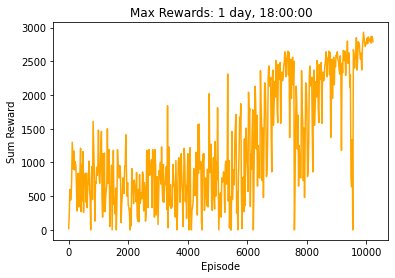

In [ ]:
print("max: ", max(reward_max))
fig, ax = plt.subplots()
ax.plot(episode, reward_max, color='orange')
# Set plot title and axes labels
ax.set(title = "Max Rewards: " + str(sum_training_time),
       xlabel = "Episode",
       ylabel = "Sum Reward")

plt.show()

max:  820


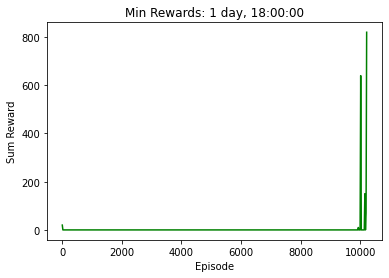

In [ ]:
print("max: ", max(reward_min))
fig, ax = plt.subplots()
ax.plot(episode, reward_min, color='green')
# Set plot title and axes labels
ax.set(title = "Min Rewards: " + str(sum_training_time),
       xlabel = "Episode",
       ylabel = "Sum Reward")

plt.show()

Exploration decay: 4000 , 9000 , 0.0002


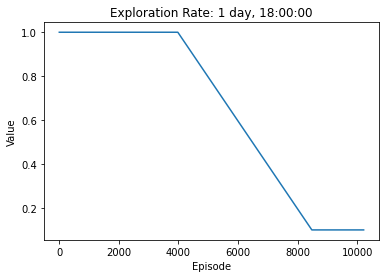

In [ ]:
EXPLORATION_MIN    = 0.1
START_EXPLORATION_DECAY = 4000
END_EXPLORATION_DECAY = 9000
EXPLORATION_DECAY  = 1.0/float(END_EXPLORATION_DECAY - START_EXPLORATION_DECAY)
print("Exploration decay: {} , {} , {}".format(START_EXPLORATION_DECAY, END_EXPLORATION_DECAY, EXPLORATION_DECAY))
exploration_rate   = 1.0

exploration_data = []
for ep in episode:
  if END_EXPLORATION_DECAY >= ep >= START_EXPLORATION_DECAY:
    if exploration_rate > EXPLORATION_MIN:
      exploration_rate -= EXPLORATION_DECAY*20
  exploration_data.append(exploration_rate)

fig, ax = plt.subplots()
ax.plot(episode, exploration_data)
# Set plot title and axes labels
ax.set(title = "Exploration Rate: " + str(sum_training_time),
       xlabel = "Episode",
       ylabel = "Value")

plt.show()